In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    directory='/gdrive/MyDrive/Risk Prediction/Dataset/Image dataset/Train/',
    target_size=(150,150),
    batch_size=157,
    color_mode='grayscale',
    class_mode='binary',
)

Found 3769 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_data=test_datagen.flow_from_directory(
    directory='/gdrive/MyDrive/Risk Prediction/Dataset/Image dataset/Test/',
    target_size=(150,150),
    batch_size=47,
    color_mode='grayscale',
    class_mode='binary'
)

Found 940 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Dead': 0, 'Recovered': 1}

In [ ]:
test_data.class_indices

{'Dead': 0, 'Recovered': 1}

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Conv1D
from keras.layers import MaxPooling1D,MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 1)),
 tf.keras.layers.MaxPooling2D(2, 2),
 # The second convolution
 tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 # The third convolution
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 # Flatten the results to feed into a DNN
 tf.keras.layers.Flatten(),
 # 512 neuron hidden layer
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
 ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
 train_generator,
 steps_per_epoch=24,
 epochs=50,
 validation_data=test_data
 )

Epoch 1/50
24/24 [==============================] - 2465s 103s/step - loss: 0.6038 - accuracy: 0.7187 - val_loss: 0.5703 - val_accuracy: 0.7553
Epoch 2/50
24/24 [==============================] - 9s 369ms/step - loss: 0.5176 - accuracy: 0.7580 - val_loss: 0.5951 - val_accuracy: 0.7255
Epoch 3/50
24/24 [==============================] - 9s 373ms/step - loss: 0.5081 - accuracy: 0.7688 - val_loss: 0.5661 - val_accuracy: 0.7372
Epoch 4/50
24/24 [==============================] - 9s 372ms/step - loss: 0.4908 - accuracy: 0.7666 - val_loss: 0.5642 - val_accuracy: 0.7532
Epoch 5/50
24/24 [==============================] - 9s 370ms/step - loss: 0.4703 - accuracy: 0.7746 - val_loss: 0.5698 - val_accuracy: 0.7372
Epoch 6/50
24/24 [==============================] - 9s 366ms/step - loss: 0.4683 - accuracy: 0.7832 - val_loss: 0.5564 - val_accuracy: 0.7319
Epoch 7/50
24/24 [==============================] - 9s 377ms/step - loss: 0.4563 - accuracy: 0.7907 - val_loss: 0.5427 - val_accuracy: 0.7245
Epoc

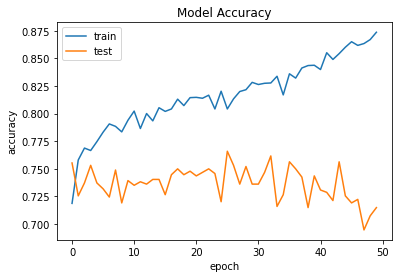

In [ ]:
#plotting the Accuracy of test and training sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()